# Assignment 1 - Data Analytics (Noli Manzoni)

## Basic stuff (data manipulation)

### Import libraries

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

**Import data for training and test**

The data do not contain NaN but "?" and therefore, I need to tell this to Pandas (na_values). At first I did not realised that the value was " ?".

In [2]:
train = pd.read_csv('./04_income/adult.train',na_values=" ?",header=0)
test = pd.read_csv('./04_income/adult.test',na_values=" ?",header=0)

In [3]:
# Check train data
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Check test data
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train.count()

age               32561
workclass         30725
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    31978
income            32561
dtype: int64

In [6]:
# Train VS Test
tot = train.count().max() + test.count().max()
print("Train is the {0:.2f}% of the total".format(train.count().max()/tot))
print("Test is the {0:.2f}% of the total".format(test.count().max()/tot))

Train is the 0.67% of the total
Test is the 0.33% of the total


### Null values

In [7]:
# Check if there are nulls
train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [9]:
# The sum because all the NaN can be all in different rows
nulls_val = train.apply(lambda x: sum(x.isnull()),axis=0).sum()
# The max because it represents the max number of rows (the row with no NaN)
normal_val = train.apply(lambda x: sum(x.notnull()),axis=0).max()

print('The null are at max {0:.2f}% of the total data'.format(nulls_val/normal_val))

The null are at max 0.13% of the total data


The null data is at max 13% of the total (if all the NaN are in different rows) and therefore, I need to find a way to deal with it. From below, I can see that all the missing values are strings and therefore I cannot replace them with interpolation.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

For me does not make sense to do an histogram with this categorical data.

### Analyse NaN values

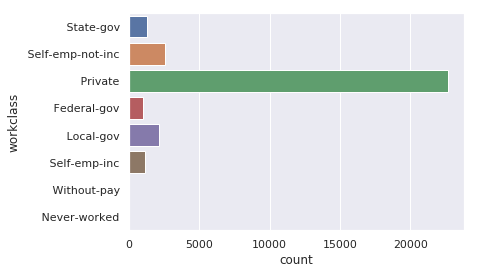

In [10]:
# Lets try to analyse the columns with null values
sns.countplot(y="workclass", data=train)

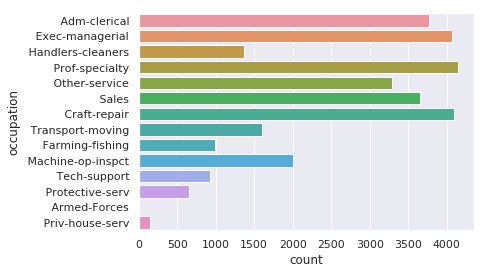

In [11]:
sns.countplot(y="occupation", data=train)

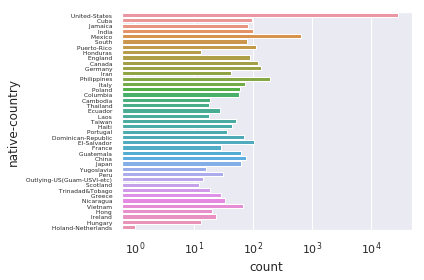

In [12]:
ax = sns.countplot(y="native-country", data=train,log=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
plt.tight_layout()

In [13]:
# The mean and median do not work with string values
# train.loc[:,'workclass'].mean()
# train.loc[:,'workclass'].median()
# The only one that work is mode which takes the most used value
train.loc[:,'workclass'].mode()

0     Private
dtype: object

I try to remove nulls by replacing them with the most used value and also to delete the entire row with dropna (two different datasets). For me replacing this kind of values with ie. the most used one, does not make a lot of sense because the given value could change the final results. Moreover, the columns do not follow any normal distribution (they are string categories).

In [14]:
# Remove null and check
train_nona = train.dropna()
train_nona.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
# Num of rows
train_nona.count()[0]

30162

**Most used values for the columns with NaN values**

In [16]:
print(train.loc[:,'occupation'].mode()[0])
print(train.loc[:,'workclass'].mode()[0])
print(train.loc[:,'native-country'].mode()[0])

 Prof-specialty
 Private
 United-States


In [17]:
# Replace null and check
train_repl = train.copy()
train_repl.loc[:,'workclass'].fillna(train.loc[:,'workclass'].mode()[0],inplace=True)
train_repl.loc[:,'occupation'].fillna(train.loc[:,'occupation'].mode()[0],inplace=True)
train_repl.loc[:,'native-country'].fillna(train.loc[:,'native-country'].mode()[0],inplace=True)
train_repl.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
train_repl.count()[0]

32561

## Analyse data

I start by analyse all the different columns of the table

### Boxplots of the numberical values column

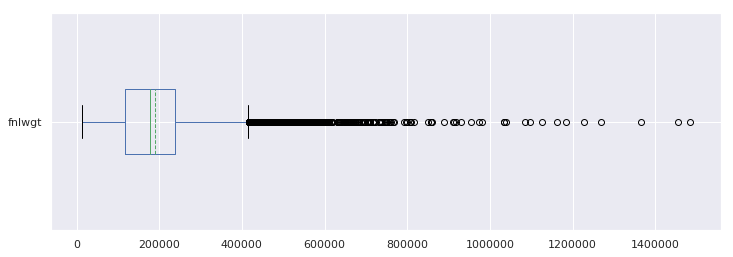

In [19]:
train_repl.boxplot(column='fnlwgt',widths=0.3,vert=False,figsize=(12,4),showmeans=True, meanline=True)

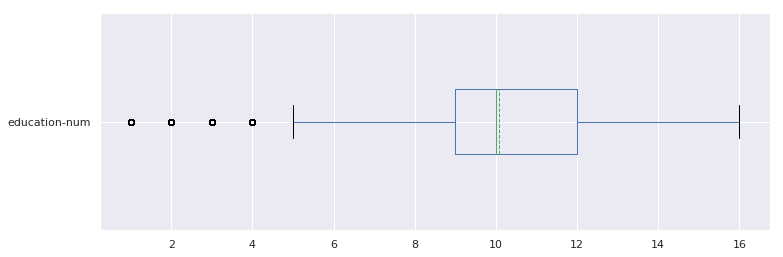

In [20]:
train_repl.boxplot(column='education-num',widths=0.3,vert=False,figsize=(12,4),showmeans=True, meanline=True)

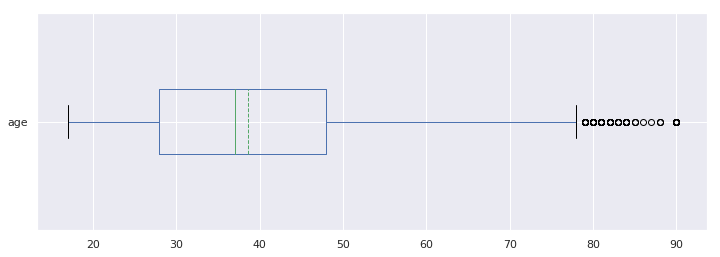

In [21]:
train_repl.boxplot(column='age',widths=0.3,vert=False,figsize=(12,4),showmeans=True, meanline=True)

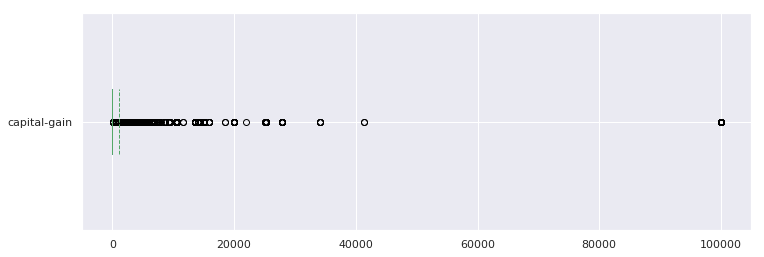

In [22]:
train_repl.boxplot(column='capital-gain',widths=0.3,vert=False,figsize=(12,4),showmeans=True, meanline=True)

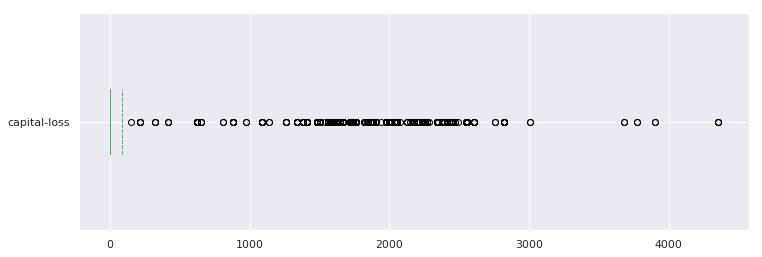

In [23]:
train_repl.boxplot(column='capital-loss',widths=0.3,vert=False,figsize=(12,4),showmeans=True, meanline=True)

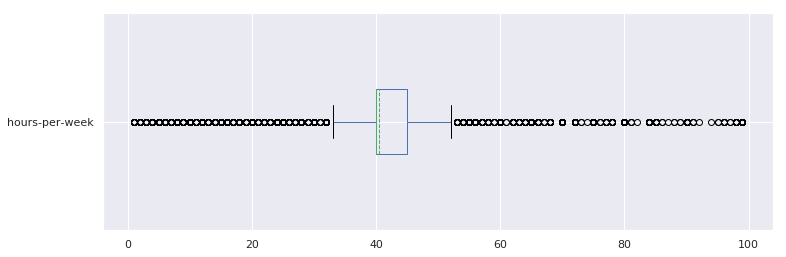

In [24]:
train_repl.boxplot(column='hours-per-week',widths=0.3,vert=False,figsize=(12,4),showmeans=True, meanline=True)

#### Comments:


I can see that age and education-num are following a Gaussian curve with some outliers. Now to get a better visualization let see them as histograms.

### Histograms of the numberical values column

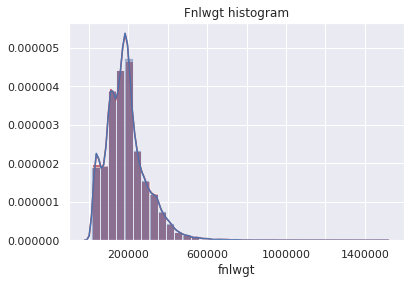

In [25]:
sns.distplot(train_nona.loc[:,'fnlwgt'],color='r',bins=35,hist_kws={'alpha':0.8}).set_title("Fnlwgt histogram")
plot_ = sns.distplot(train.loc[:,'fnlwgt'],color='b',bins=35,hist_kws={'alpha':0.5})

# Limit number of xticks
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

I can see that fnlwgt (final weight from google -> it makes sense fnl wgt) follow some kind of Gaussian distribution. It is some kind of weight maybe based on the population ?!?!?! If I do not know what it means maybe I should not use it!

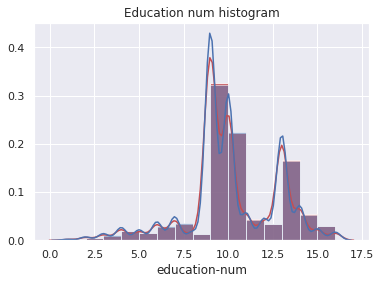

In [26]:
sns.distplot(train_nona.loc[:,'education-num'],color='r',bins=15,hist_kws={'alpha':0.8}).set_title("Education num histogram")
sns.distplot(train.loc[:,'education-num'],color='b',bins=15,hist_kws={'alpha':0.5})

On the other hand, education-num does not follow exactely a Guassian distribution (still there is some underliying structure). I do not know exactely what it represents (some connection with education? the years of education ?)

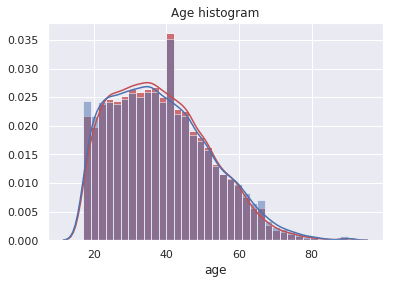

In [27]:
sns.distplot(train_nona.loc[:,'age'],color='r',bins=35,hist_kws={'alpha':0.8}).set_title("Age histogram")
sns.distplot(train_repl.loc[:,'age'],color='b',bins=35,hist_kws={'alpha':0.5})

Here I can see that age follow a Guassian distribution as seen from the box plot

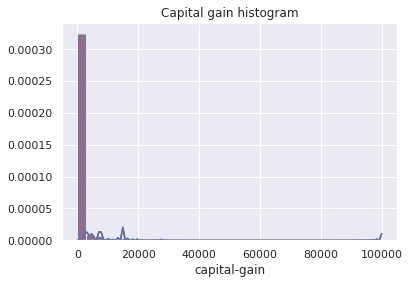

In [28]:
sns.distplot(train_nona.loc[:,'capital-gain'],color='r',bins=35,hist_kws={'alpha':0.8}).set_title("Capital gain histogram")
sns.distplot(train.loc[:,'capital-gain'],color='b',bins=35,hist_kws={'alpha':0.5})

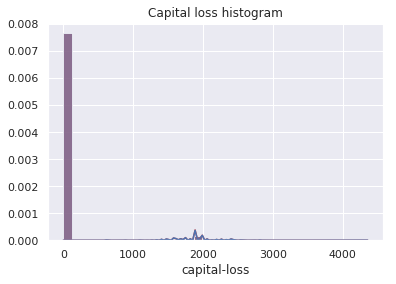

In [29]:
sns.distplot(train_nona.loc[:,'capital-loss'],color='r',bins=35,hist_kws={'alpha':0.8}).set_title("Capital loss histogram")
sns.distplot(train.loc[:,'capital-loss'],color='b',bins=35,hist_kws={'alpha':0.5})

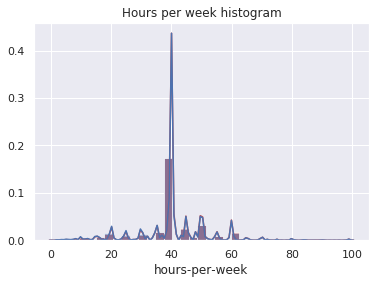

In [30]:
sns.distplot(train_nona.loc[:,'hours-per-week'],color='r',bins=35,hist_kws={'alpha':0.8}).set_title("Hours per week histogram")
sns.distplot(train.loc[:,'hours-per-week'],color='b',bins=35,hist_kws={'alpha':0.5})

These three histograms shown, as seen from the box plot, that these columns do not follow some kind of normal distribution.

### Bar chart of string values columns

To get a better view about the string data lets see their bar charts. I plot with the dataset where NaN have been replaced with the most used value and also the dataset with missing rows.

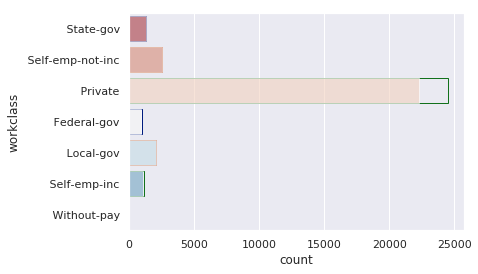

In [31]:
sns.countplot(y="workclass", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=1,edgecolor=sns.color_palette("dark", 3))
sns.countplot(y="workclass", data=train_nona,palette="RdBu",alpha=0.6)

In this case there is a big miss in the dataset where I deleted the rows because the federal-gov column is almost empty) Anyway, there is some kind of redundancy in this data, probably is better to put togheter federal-gov, local-gov and state-gov under the same category ie. governament. Moreover, self-emp-inc and self-emp-not-inc can be put uder self-emp.

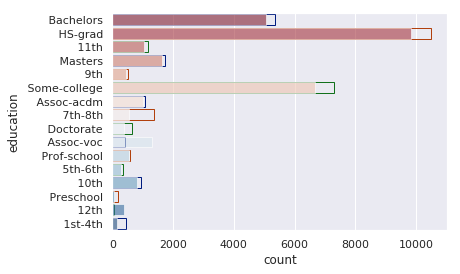

In [32]:
sns.countplot(y="education", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=1,edgecolor=sns.color_palette("dark", 3))
sns.countplot(y="education", data=train_nona,palette="RdBu",alpha=0.6)

I do not really know about these kind of education (United-states?) but I think it is important to have all these categories to infer the income. If there is some connection with the education-num, maybe I can delete this column and use only the other one. I need to check it with correlation

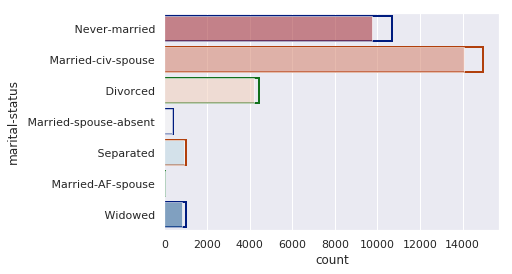

In [33]:
sns.countplot(y="marital-status", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
sns.countplot(y="marital-status", data=train_nona,palette="RdBu",alpha=0.6)

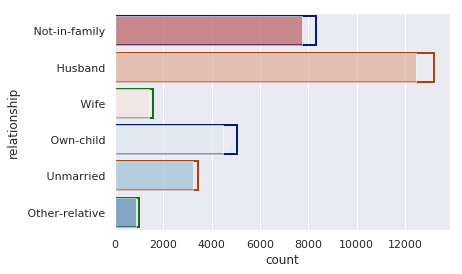

In [34]:
sns.countplot(y="relationship", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
sns.countplot(y="relationship", data=train_nona,palette="RdBu",alpha=0.6)

These two columns have some connection and redundancy because if someone is married it will be wife or husband and if it is divorced probabily is not in a family. Maybe I can put togher some of the data? Husband with wife (are the same!), merried-civ-spose and married-spouse-absent etc. Need to check it with correlation of the column!

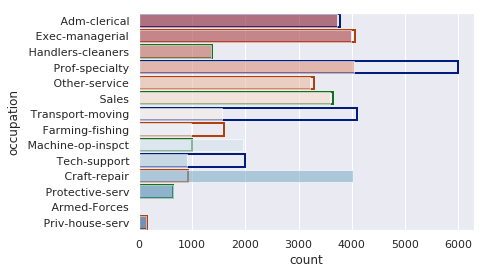

In [35]:
sns.countplot(y="occupation", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
sns.countplot(y="occupation", data=train_nona,palette="RdBu",alpha=0.6)

Nothing to say, I think these categories are important to infer the income.

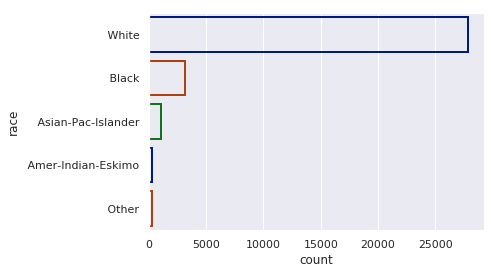

In [36]:
sns.countplot(y="race", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
# sns.countplot(y="race", data=train_nona,palette="RdBu",alpha=0.6)

I can clearely see that the vast majority of this data set are white people. Thata set is not really heterogeneous.

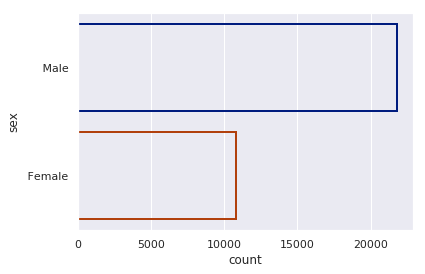

In [37]:
sns.countplot(y="sex", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
# sns.countplot(y="sex", data=train_nona,palette="RdBu",alpha=0.6)

There is a majority of males in this data set. Not really heterogeneous (some bias used to collect data?)

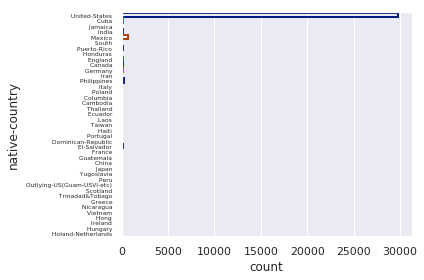

In [38]:
ax = sns.countplot(y="native-country", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
# sns.countplot(y="native-country", data=train_nona,palette="RdBu",alpha=0.6)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
plt.tight_layout()

The vast majority of people in this data set are from united-state! Not heterogeneous (data has been collected in USA?)

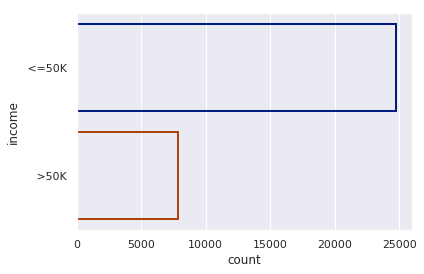

In [39]:
sns.countplot(y="income", data=train_repl,facecolor=(0, 0, 0, 0), linewidth=2,edgecolor=sns.color_palette("dark", 3))
# sns.countplot(y="income", data=train_nona,palette="RdBu",alpha=0.6)

Majority of people have an income smaller than 50k.

### Check assumptions

Above, I made some assumptions on the data now I need to check them with the correlation between columns.

In [40]:
train_repl.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Unfortunately, the data has a lot of columns with string which are not taken into consideration in the correlation computation and therefore I need to find a way to include them.

#### Data manipulation (string to codes)

This code trasforms the categories in codes so that I can see the correlation between the text columns.

In [41]:
train_cat = train_repl.copy()
train_cat['workclass']= train_repl['workclass'].astype('category').cat.codes
train_cat['education']= train_repl['education'].astype('category').cat.codes
train_cat['marital-status']= train_repl['marital-status'].astype('category').cat.codes
train_cat['occupation']= train_repl['occupation'].astype('category').cat.codes
train_cat['relationship']= train_repl['relationship'].astype('category').cat.codes
train_cat['race']= train_repl['race'].astype('category').cat.codes
train_cat['sex']= train_repl['sex'].astype('category').cat.codes
train_cat['native-country']= train_repl['native-country'].astype('category').cat.codes
train_cat['income']= train_repl['income'].astype('category').cat.codes

# To go back
# train_n['workclass'] = train_n['workclass'].astype('category').cat.codes.map( dict( enumerate(train['workclass'].astype('category').cat.categories) ) ).astype('category')
# train_n.head()

In [42]:
train_cat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Heatmap

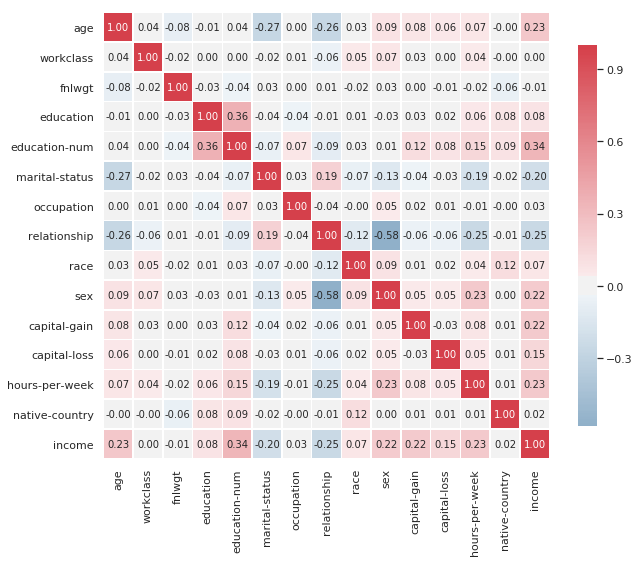

In [43]:
cmap = sns.diverging_palette(240,10,70, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_cat.corr(),vmax=1.0,center=0,fmt='.2f',square=True,linewidths=.5,annot=True,cbar_kws={'shrink':.7},cmap=cmap)

#### Comments:

As I though, there it correlation between education and education-num, martial-status and relationship and also between hours-per-week and sex.

In my opinition education and education-num are really connected whereas martial-status and relationship have some kind of redundancy but not completely. On the other hand, hours-per-week and sex do not have any correlation.

Moreover, there is some negative correlation between sex and relationship (male will be probably husband and female will be wife), age and marital-status (young people will be probably single whereas older people will be married) and other minor correlations that are not so important.

**Income:** As far I can see now the income has some correlation with other columns and therefore in order to understand better how the prediciton work, I think it is better to anylse more deeply the relation of income and the other columns.

## Important remarks

**I have decided to work with the dataset where I have replaced the NaN with the most used value because in the other case (where I have deleted the rows) there is lot less information.** Moreover, the correlation of the columns is the same with both dataset set and in the next steps I will try to cluster together some of the columns' values.

### Cluster together columns' values

Ok now before checking for these connections (check correlation) I cluster some of the categories together.

#### Workclass

In [45]:
train_repl.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [46]:
train_repl.replace([" State-gov"," Federal-gov", " Local-gov"]," Gov",inplace=True)
train_repl.replace([" Self-emp-not-inc"," Self-emp-inc"]," Self-imp", inplace=True)
train_repl.replace([" Without-pay", " Never-worked"], "Other", inplace=True)

In [47]:
train_repl.workclass.unique()

array([' Gov', ' Self-imp', ' Private', 'Other'], dtype=object)

**Marital-status**

In [48]:
train_repl.loc[:,"marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [49]:
train_repl.replace([" Married-civ-spouse"," Married-AF-spouse"]," Married",inplace=True)

In [50]:
train_repl.loc[:,"marital-status"].unique()

array([' Never-married', ' Married', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Widowed'], dtype=object)

**Relationship**

In [51]:
train_repl.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [52]:
train_repl.replace([" Husband", " Wife"], " Hus/Wi", inplace=True)
# It can be deduced from the sex

In [53]:
train_repl.relationship.unique()

array([' Not-in-family', ' Hus/Wi', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

#### Remarks:


This is a simplification of the model and therefore it could cause a decrease in the precision of the system (income prediction). For this reason, it is better to test this version and then compare it with no simplified data!

### Check correlation between columns

**Education and education-num**

In [54]:
train_repl.loc[:,["education","education-num","age"]].groupby(['education',"education-num"]).count()

,,age
education,education-num,
10th,6,933
11th,7,1175
12th,8,433
1st-4th,2,168
5th-6th,3,333
7th-8th,4,646
9th,5,514
Assoc-acdm,12,1067
Assoc-voc,11,1382


I can cleary see that there are not duplicatea in the group. Therefore, it means that the education-num is the same as education! I can drop the education column (the text one)!

In [55]:
train_repl = train_repl.drop(["education"],axis=1)

In [56]:
train_repl.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-imp,83311,13,Married,Exec-managerial,Hus/Wi,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married,Handlers-cleaners,Hus/Wi,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married,Prof-specialty,Hus/Wi,Black,Female,0,0,40,Cuba,<=50K


#### Marital-status and relationship

In [57]:
train_repl.loc[:,["relationship","marital-status","sex"]].groupby(['relationship',"marital-status"]).count()

sex
relationship    marital-status               
 Hus/Wi          Married                14761
 Not-in-family   Divorced                2404
                 Married                   17
                 Married-spouse-absent    211
                 Never-married           4706
                 Separated                420
                 Widowed                  547
 Other-relative  Divorced                 110
                 Married                  125
                 Married-spouse-absent     32
                 Never-married            611
                 Separated                 55
                 Widowed                   48
 Own-child       Divorced                 328
                 Married                   96
                 Married-spouse-absent     45
                 Never-married           4485
                 Separated                 99
                 Widowed                   15
 Unmarried       Divorced                1601
                 Married-spouse-absent    130
                 Never-married            881
                 Separated                451
                 Widowed                  383

There is not a really good correlation because different relationship values are related to different marital-status values. For this reason I cannot delete any of these two columns.

# Predict income

## Understand columns correlation with the income

Before strating to predict the income with Linear Regression, I want to see if there are correlation between the income and other columns.

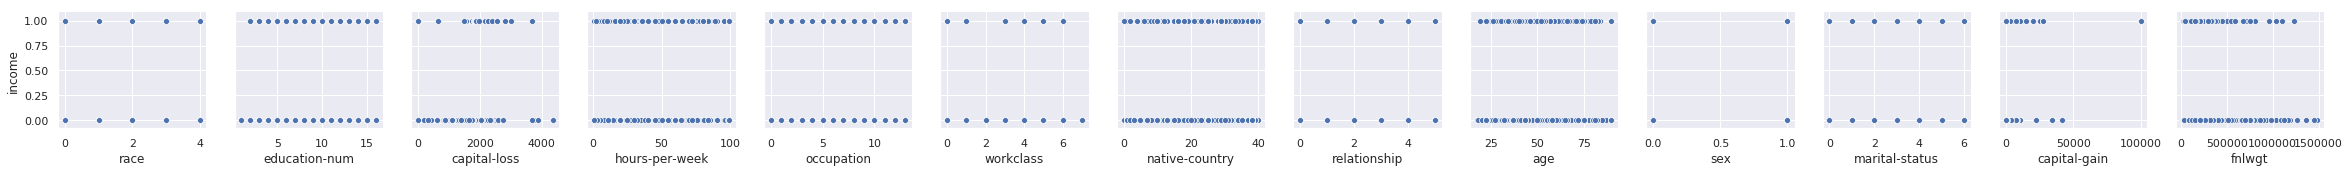

In [58]:
p=sns.pairplot(train_cat,x_vars={'age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'},y_vars={'income'})

I cannot see a lot with pairplot!

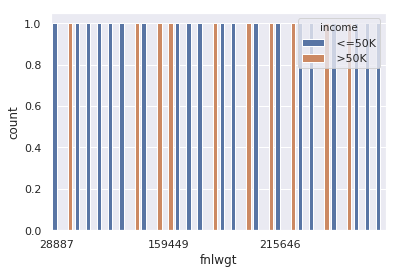

In [59]:
# plt.figure(figsize=(16,5))
ax = sns.countplot(x="fnlwgt", hue="income", data=train_repl[:30])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

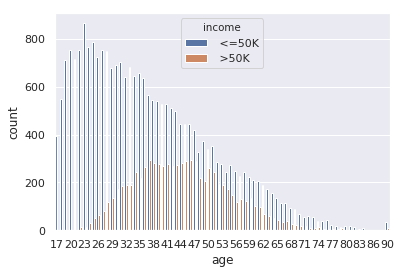

In [60]:
ax = sns.countplot(x="age", hue="income", data=train_repl)
# Limit number of xticks
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

I can see that there is some kind of relation between the age and the income. It seem taht when you are young you are more inclide to get less than 50k where as in the middle age (30-60) there is a possibility to get more than that. Moreover, I can see that after 70 years the number of people who still have an income is lower and lower.

In [45]:
# Function to add percentage to columns
def add_percentage(ax):
    j = int(len(ax.patches)/2)
    for i in range(0,j):
        p = ax.patches[i]
        p1 = ax.patches[i+j]
        height1 = p.get_height()
        height2 = p1.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height1 + 3,
            '{:1.2f}'.format(height1/(height1+height2)),
            ha="center")
        ax.text(p1.get_x()+p1.get_width()/2.,
            height2 + 3,
            '{:1.2f}'.format(height2/(height1+height2)),
            ha="center")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


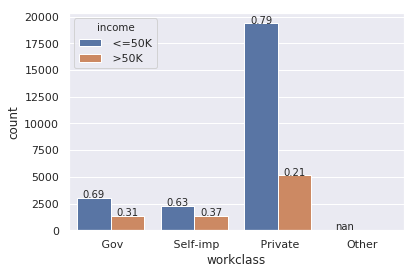

In [62]:
ax = sns.countplot(x="workclass", hue="income", data=train_repl)
add_percentage(ax)

I can see that the vast majority of people in the dataset has an income less than 50k. Moreover, I can see that the quantity of people that gain more than 50k in the private category is bigger than the sum from the other two categories!

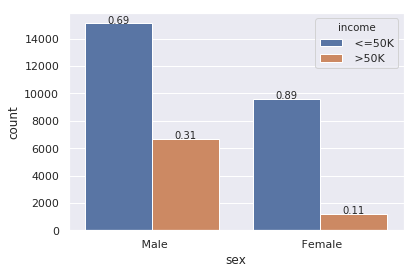

In [63]:
ax = sns.countplot(x="sex", hue="income", data=train_repl)
add_percentage(ax)

Men have an higher number of people that has an income bigger than 50k. Only 11% of women vs 31% of men.

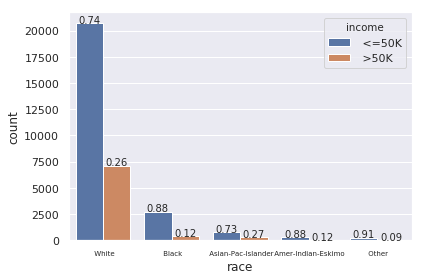

In [64]:
ax = sns.countplot(x="race", hue="income", data=train_repl)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()

add_percentage(ax)

This data set is almost about only white so I cannot make good comparisons. Here we can see that white people have a larger number worker that get more than 50k. White are 26% vs 12% of black and 27 of asian, etc.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


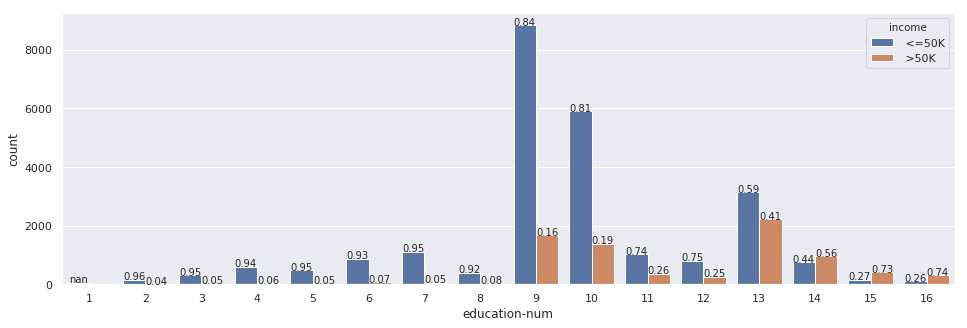

In [65]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x="education-num", hue="income", data=train_repl)
add_percentage(ax)

Here I can see that people start to have an income more than 50k after at leas 9 years of school. Moreover, more years of school is equal to a grether number of people who gain more than 50k. People with 15 and 16 years almost gain only more than 50k (75% of people!).

The education is strictly connected with the income!

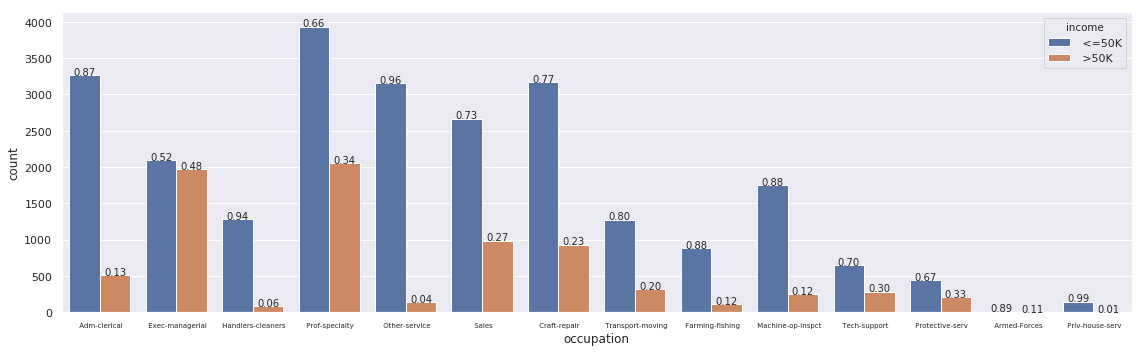

In [66]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x="occupation", hue="income", data=train_repl)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()

add_percentage(ax)

Here the only remark that I have is that exec-manegerial and prof-speciality are the ones who has an higher income based on the total of the gategory.

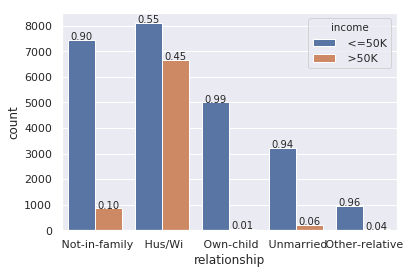

In [67]:
ax = sns.countplot(x="relationship", hue="income", data=train_repl)
add_percentage(ax)

Here I can see that the only ones that gain more than 50k are husband and wife  (almost 50% of the couple)!

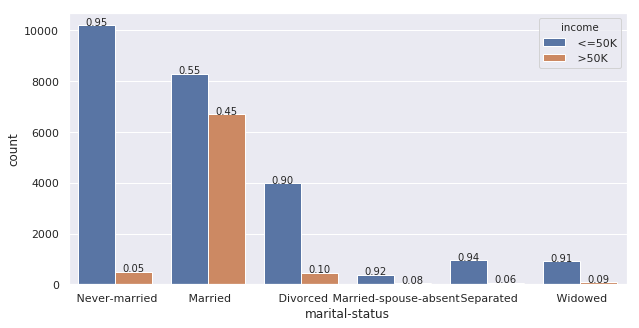

In [68]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="marital-status", hue="income", data=train_repl)
add_percentage(ax)

Here I have the same information as the relationship. We can see that almost only married (hustband and wife) gain more than 50k.

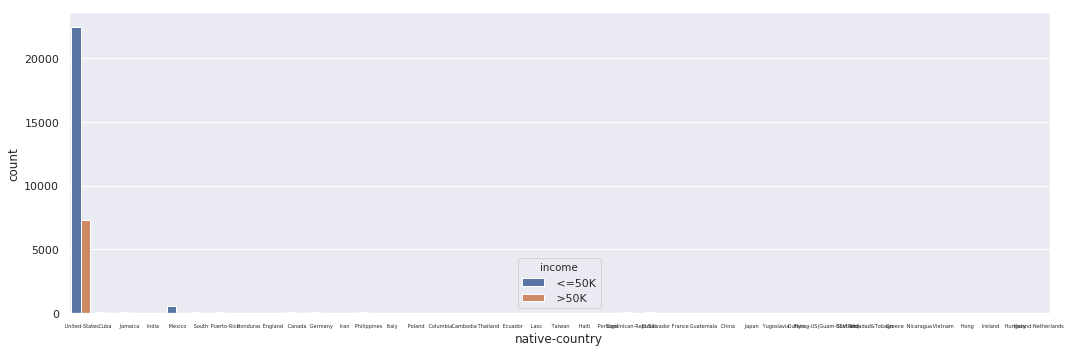

In [50]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="native-country", hue="income", data=train_repl)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
plt.tight_layout()

The population almost come only from the USA therefore, I cannot make comments on this graph.

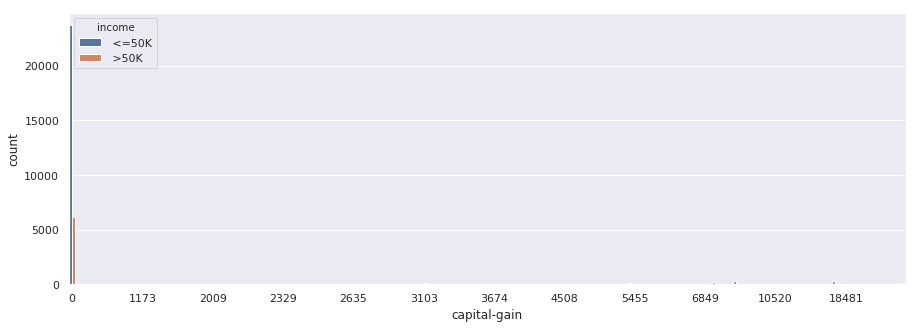

In [70]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="capital-gain", hue="income", data=train_repl)


# Limit number of xticks
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [71]:
train_repl.loc[:,["capital-gain","income","sex"]].groupby(['capital-gain',"income"]).count()

sex
capital-gain income       
0             <=50K  23685
              >50K    6164
114           <=50K      6
401           <=50K      2
594           <=50K     34
914           <=50K      8
991           <=50K      5
1055          <=50K     25
1086          <=50K      4
1111          <=50K      1
1151          <=50K      8
1173          <=50K      3
1409          <=50K      7
1424          <=50K      3
1455          <=50K      1
1471          <=50K      7
1506          <=50K     15
1639          <=50K      1
1797          <=50K      7
1831          <=50K      7
1848          <=50K      6
2009          <=50K      3
2036          <=50K      4
2050          <=50K      5
2062          <=50K      2
2105          <=50K      9
2174          <=50K     48
2176          <=50K     23
2202          <=50K     16
2228          <=50K      5
...                    ...
6767          <=50K      5
6849          <=50K     27
7298          >50K     246
7430          >50K       9
7443          <=50K      5
7688          >50K     284
7896          >50K       3
7978          <=50K      1
8614          >50K      55
9386          >50K      22
9562          >50K       4
10520         >50K      43
10566         <=50K      6
10605         >50K      12
11678         >50K       2
13550         >50K      27
14084         >50K      41
14344         >50K      26
15020         >50K       5
15024         >50K     347
15831         >50K       6
18481         >50K       2
20051         >50K      37
22040         <=50K      1
25124         >50K       4
25236         >50K      11
27828         >50K      34
34095         <=50K      5
41310         <=50K      2
99999         >50K     159

[122 rows x 1 columns]

From the graph I cannot see a lot but from the table I can see that under a gain of 7000 there are only people with an income less thant 50k. On the other hand, above 7000 there is a majority of people with more thant 50k (there are still some outliers)

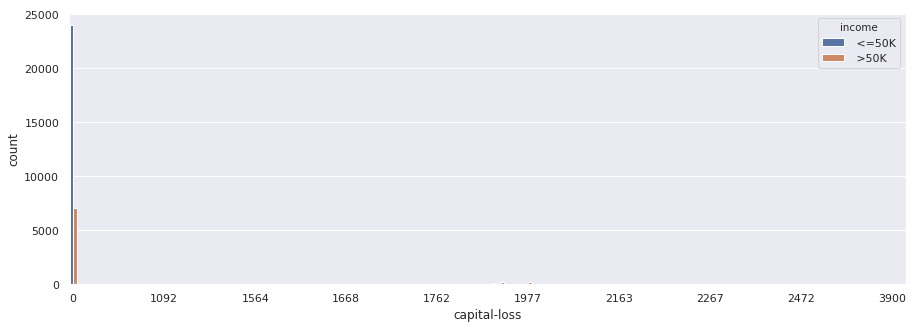

In [72]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="capital-loss", hue="income", data=train_repl)


# Limit number of xticks
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [73]:
train_repl.loc[:,["capital-loss","income","sex"]].groupby(['capital-loss',"income"]).count()

sex
capital-loss income       
0             <=50K  23974
              >50K    7068
155           <=50K      1
213           <=50K      4
323           <=50K      3
419           <=50K      3
625           <=50K     12
653           <=50K      1
              >50K       2
810           <=50K      2
880           <=50K      6
974           <=50K      2
1092          <=50K      7
1138          <=50K      2
1258          <=50K      4
1340          <=50K      7
1380          <=50K      7
1408          <=50K     21
1411          <=50K      1
1485          <=50K     20
              >50K      31
1504          <=50K     18
1539          <=50K      1
1564          >50K      25
1573          <=50K      6
1579          <=50K     20
1590          <=50K     40
1594          <=50K      8
1602          <=50K     47
1617          <=50K      9
...                    ...
2206          <=50K      6
2231          >50K       3
2238          <=50K      2
2246          >50K       6
2258          <=50K     12
              >50K      13
2267          <=50K      3
2282          >50K       1
2339          <=50K     17
2352          <=50K      2
2377          <=50K      9
              >50K      11
2392          >50K       9
2415          >50K      49
2444          >50K      12
2457          <=50K      3
2467          <=50K      1
2472          >50K       1
2489          <=50K      1
2547          >50K       4
2559          >50K      12
2603          <=50K      5
2754          <=50K      2
2824          >50K      10
3004          >50K       2
3683          <=50K      1
              >50K       1
3770          <=50K      2
3900          <=50K      2
4356          <=50K      3

[99 rows x 1 columns]

Here until a loss of 2000 there are almost only people with less than 50k (some outlieris). On the other hand above it seem that the two categories are balanced!

**These last three columns are really skewd so I will drop them for the classification**

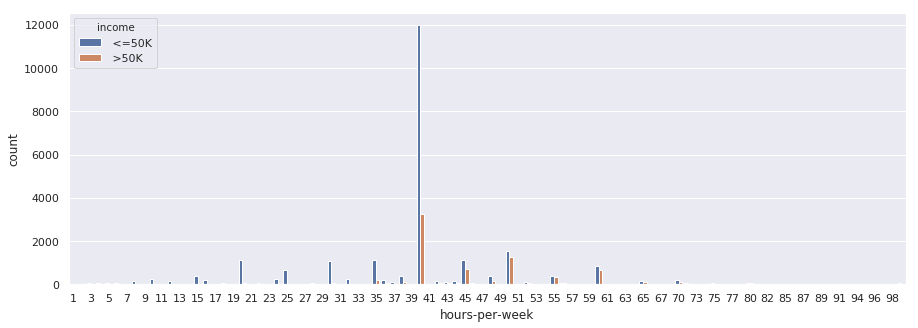

In [74]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="hours-per-week", hue="income", data=train_repl)


# Limit number of xticks
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Here I can see that the majority of people start to have an income bigger than 50k when they work more than 40 (some outliers with less hours).

## Logistic Regression

Here I need to classify a binary category (less or more) so I can use a **logistic regression** or other technique from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.

### Load and prepare data

In [4]:
train_regr = train.copy()
test_regr = test.copy()
# See motivation above
train_regr = train_regr.drop(["education"],axis=1)
test_regr = test_regr.drop(["education"],axis=1)
# no idea of what flnwg is so i drop it
train_regr = train_regr.drop(["fnlwgt"],axis=1)
test_regr = test_regr.drop(["fnlwgt"],axis=1)

# Fill null values (replace null in test sets with train set most used one)
train_regr.loc[:,'workclass'].fillna(train_regr.loc[:,'workclass'].mode()[0],inplace=True)
train_regr.loc[:,'occupation'].fillna(train_regr.loc[:,'occupation'].mode()[0],inplace=True)
test_regr.loc[:,'workclass'].fillna(train_regr.loc[:,'workclass'].mode()[0],inplace=True)
test_regr.loc[:,'occupation'].fillna(train_regr.loc[:,'occupation'].mode()[0],inplace=True)

# label clustering
train_regr.replace([" State-gov"," Federal-gov", " Local-gov"]," Gov",inplace=True)
train_regr.replace([" Self-emp-not-inc"," Self-emp-inc"]," Self-imp", inplace=True)
train_regr.replace([" Without-pay", " Never-worked"], "Other", inplace=True)
test_regr.replace([" State-gov"," Federal-gov", " Local-gov"]," Gov",inplace=True)
test_regr.replace([" Self-emp-not-inc"," Self-emp-inc"]," Self-imp", inplace=True)
test_regr.replace([" Without-pay", " Never-worked"], "Other", inplace=True)

train_regr.replace([" Married-civ-spouse"," Married-AF-spouse"]," Married",inplace=True)
test_regr.replace([" Married-civ-spouse"," Married-AF-spouse"]," Married",inplace=True)

train_regr.replace([" Husband", " Wife"], " Hus/Wi", inplace=True)
test_regr.replace([" Husband", " Wife"], " Hus/Wi", inplace=True)

# Categories to int
train_regr['workclass']= train_regr['workclass'].astype('category').cat.codes
train_regr['marital-status']= train_regr['marital-status'].astype('category').cat.codes
train_regr['occupation']= train_regr['occupation'].astype('category').cat.codes
train_regr['relationship']= train_regr['relationship'].astype('category').cat.codes
train_regr['race']= train_regr['race'].astype('category').cat.codes
train_regr['sex']= train_regr['sex'].astype('category').cat.codes
train_regr['income']= train_regr['income'].astype('category').cat.codes
train_regr['native-country']= train_regr['native-country'].astype('category').cat.codes

test_regr['native-country']= test_regr['native-country'].astype('category').cat.codes
test_regr['workclass']= test_regr['workclass'].astype('category').cat.codes
test_regr['marital-status']= test_regr['marital-status'].astype('category').cat.codes
test_regr['occupation']= test_regr['occupation'].astype('category').cat.codes
test_regr['relationship']= test_regr['relationship'].astype('category').cat.codes
test_regr['race']= test_regr['race'].astype('category').cat.codes
test_regr['sex']= test_regr['sex'].astype('category').cat.codes
test_regr['income']= test_regr['income'].astype('category').cat.codes


print(test['income'].astype('category').cat.categories)
print(test_regr['income'].astype('category').cat.categories)

x_train = train_regr.drop(['income'],axis=1)
y_train = train_regr.income

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
# Normalize features
x_train -= mean
x_train /= std

x_test = test_regr.drop(['income'],axis=1)
y_test = test_regr.income

# Normalize features
x_test -= mean
x_test /= std


Index([' <=50K.', ' >50K.'], dtype='object')
Int64Index([0, 1], dtype='int64')


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [6]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_train_hat = logreg.predict(x_train)
print("MSE score on train: {0:.3f}".format(mean_squared_error(y_true=y_train,y_pred=y_train_hat)))
y_test_hat = logreg.predict(x_test)
print("MSE score on test: {0:.3f}".format(mean_squared_error(y_true=y_test,y_pred=y_test_hat)))
print("Accuracy: {0:.3f}".format(logreg.score(x_test,y_test)))

MSE score on train: 0.161
MSE score on test: 0.161
Accuracy: 0.839


/Users/raikilon/workspace/school/data_analytics/class_examples/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Neural Nets

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

MSE score on train: 0.138
MSE score on test: 0.150
Accuracy: 0.850
Precision: 0.727
Recal: 0.583


/Users/raikilon/workspace/school/data_analytics/class_examples/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


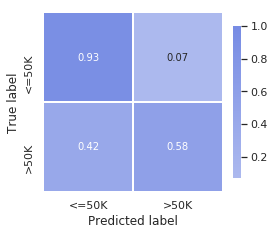

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(20,20,20), alpha=1e-5)
clf.fit(x_train,y_train)
y_train_hat = clf.predict(x_train)
print("MSE score on train: {0:.3f}".format(mean_squared_error(y_true=y_train,y_pred=y_train_hat)))
y_test_hat = clf.predict(x_test)
print("MSE score on test: {0:.3f}".format(mean_squared_error(y_true=y_test,y_pred=y_test_hat)))
print("Accuracy: {0:.3f}".format(clf.score(x_test,y_test)))


cmap = sns.light_palette((260, 75, 60), input="husl",as_cmap=True)
fig, ax = plt.subplots(figsize=(4,4))
cm = confusion_matrix(y_test,y_test_hat)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm,vmax=1.0,center=0,fmt='.2f',square=True,linewidths=.5,annot=True,cbar_kws={'shrink':.7},cmap=cmap,xticklabels=['<=50K','>50K'],yticklabels=['<=50K','>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

vals = precision_recall_fscore_support(y_test, y_test_hat, average='binary')
# Percentage of correcly income predictions over all the predictions
print("Precision: {0:.3f}".format(vals[0]))
# Percentage of correctly income predictions over all the possible income
print("Recal: {0:.3f}".format(vals[1]))

### SVM

In [9]:
from sklearn.svm import SVC

In [10]:
svm = SVC(gamma=2, C=1)
svm.fit(x_train,y_train)
y_train_hat = svm.predict(x_train)
print("MSE score on train: {0:.3f}".format(mean_squared_error(y_true=y_train,y_pred=y_train_hat)))
y_test_hat = svm.predict(x_test)
print("MSE score on test: {0:.3f}".format(mean_squared_error(y_true=y_test,y_pred=y_test_hat)))
print("Accuracy: {0:.3f}".format(svm.score(x_test,y_test)))

MSE score on train: 0.095
MSE score on test: 0.171
Accuracy: 0.829


### NAIVE BAYES

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_train_hat = gnb.predict(x_train)
print("MSE score on train: {0:.3f}".format(mean_squared_error(y_true=y_train,y_pred=y_train_hat)))
y_test_hat = gnb.predict(x_test)
print("MSE score on test: {0:.3f}".format(mean_squared_error(y_true=y_test,y_pred=y_test_hat)))
print("Accuracy: {0:.3f}".format(gnb.score(x_test,y_test)))

MSE score on train: 0.187
MSE score on test: 0.185
Accuracy: 0.815


### Quadratic Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
y_train_hat = qda.predict(x_train)
print("MSE score on train: {0:.3f}".format(mean_squared_error(y_true=y_train,y_pred=y_train_hat)))
y_test_hat = qda.predict(x_test)
print("MSE score on test: {0:.3f}".format(mean_squared_error(y_true=y_test,y_pred=y_test_hat)))
print("Accuracy: {0:.3f}".format(qda.score(x_test,y_test)))

MSE score on train: 0.196
MSE score on test: 0.194
Accuracy: 0.806
